<a href="https://colab.research.google.com/github/Rajalakshmi1910/Project1/blob/main/Rajalakshmi_Exercise_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
df = pd.read_csv('/content/Excercise dataset.csv')
df.head()


,pose_id,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
0,0,squats_up,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,...,33.283375,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140
1,1,situp_down,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,...,-8.073100,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070
2,2,situp_down,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,...,-132.024460,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830
3,3,jumping_jacks_up,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,...,51.615970,-15.543400,38.251835,34.033176,16.610210,46.572014,38.680614,-18.784650,45.098710,20.343110
4,4,jumping_jacks_down,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,...,-2.849554,2.811829,56.000500,56.605590,0.566345,66.231050,-19.252045,-3.451297,60.029484,45.503677


In [11]:
df['pose'].value_counts()

jumping_jacks_down    151
jumping_jacks_up      145
pullups_down          123
pushups_up            115
squats_up             111
pullups_up            108
squats_down           101
situp_down             82
pushups_down           82
situp_up               79
Name: pose, dtype: int64

In [12]:
df.iloc[:,1:11].describe()

,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,0.053648,-37.326796,-30.706541,0.485687,-39.509185,-30.524985,0.792095,-39.545846,-30.527955
std,23.649281,31.048437,54.656192,24.497339,31.346824,54.992888,24.485701,31.211337,54.993625
min,-65.973076,-68.403656,-445.800080,-66.538180,-71.202156,-458.567570,-65.191660,-71.224174,-458.579440
25%,-4.109430,-55.254955,-48.765510,-3.341005,-57.540430,-46.496040,-3.270816,-57.428230,-46.487988
50%,-0.113795,-50.883630,-24.786951,0.331020,-52.950300,-23.692810,0.688978,-52.864372,-23.712904
75%,3.538332,-34.784786,-2.454670,4.206791,-36.975080,-3.096046,4.873786,-37.186440,-3.097870
max,64.850930,83.510440,242.465380,66.834670,80.629990,253.638150,67.458220,79.560450,253.774290


In [13]:
df.iloc[:,11:21].describe()

,x_left_eye_outer,y_left_eye_outer,z_left_eye_outer,x_right_eye_inner,y_right_eye_inner,z_right_eye_inner,x_right_eye,y_right_eye,z_right_eye,x_right_eye_outer
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,1.083083,-39.579255,-30.539071,-0.404226,-39.530934,-30.399054,-0.717782,-39.589658,-30.405472,-1.008636
std,24.462829,31.062697,55.000004,24.482050,31.282611,55.206632,24.470752,31.071644,55.214603,24.448016
min,-64.942210,-71.317010,-458.670560,-66.657745,-72.438034,-459.228100,-66.577270,-73.024220,-459.327360,-67.245674
25%,-3.233219,-57.418007,-46.501522,-4.169279,-57.555176,-46.615210,-4.438617,-57.505165,-46.626633,-4.685193
50%,1.111716,-52.837370,-23.728231,-0.778509,-52.942234,-23.604742,-1.272852,-52.853650,-23.601427,-1.704646
75%,5.333421,-37.605465,-3.091778,3.326515,-37.796880,-3.507623,2.832518,-37.921380,-3.504497,2.903784
max,64.513830,77.769810,253.702790,62.453610,81.047905,250.179800,61.723488,79.942140,250.111310,61.110146


In [14]:
df.describe()

,pose_id,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,...,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,548.000000,0.053648,-37.326796,-30.706541,0.485687,-39.509185,-30.524985,0.792095,-39.545846,-30.527955,...,26.510942,-4.483414,35.229423,28.636009,3.289102,40.228771,14.356177,-5.158548,39.911178,16.617366
std,316.820927,23.649281,31.048437,54.656192,24.497339,31.346824,54.992888,24.485701,31.211337,54.993625,...,68.457885,27.153198,29.035621,67.821931,29.062193,31.379031,72.328249,29.559802,31.403258,71.804185
min,0.000000,-65.973076,-68.403656,-445.800080,-66.538180,-71.202156,-458.567570,-65.191660,-71.224174,-458.579440,...,-368.987880,-87.276010,-99.969400,-334.563870,-81.992210,-99.275190,-423.637570,-97.181305,-99.920200,-380.154000
25%,274.000000,-4.109430,-55.254955,-48.765510,-3.341005,-57.540430,-46.496040,-3.270816,-57.428230,-46.487988,...,-5.678543,-13.371049,18.600668,-2.854865,-5.930643,23.143908,-14.776978,-16.590565,23.575298,-15.244630
50%,548.000000,-0.113795,-50.883630,-24.786951,0.331020,-52.950300,-23.692810,0.688978,-52.864372,-23.712904,...,24.861042,-4.042651,43.930687,25.423359,3.645946,50.737988,10.905448,-4.533698,50.243694,11.231042
75%,822.000000,3.538332,-34.784786,-2.454670,4.206791,-36.975080,-3.096046,4.873786,-37.186440,-3.097870,...,46.762560,3.143690,56.155956,45.967274,15.428953,62.077587,35.520462,3.517952,61.494850,36.787037
max,1096.000000,64.850930,83.510440,242.465380,66.834670,80.629990,253.638150,67.458220,79.560450,253.774290,...,541.711100,83.391620,98.518140,540.971600,98.586450,99.829030,565.342400,94.965490,99.537735,558.523600


In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [16]:
encoder = LabelEncoder()
y = df['pose']
y = encoder.fit_transform(y)

In [17]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = {}
for idx, x in enumerate(class_weights):
    class_weights_dict[idx] = x

In [18]:
class_weights_dict

{0: 0.7264900662251655,
 1: 0.756551724137931,
 2: 0.891869918699187,
 3: 1.0157407407407408,
 4: 1.3378048780487806,
 5: 0.9539130434782609,
 6: 1.3378048780487806,
 7: 1.388607594936709,
 8: 1.0861386138613862,
 9: 0.9882882882882883}

In [19]:
scaler = MinMaxScaler()

In [20]:
X = df.drop(['pose_id', 'pose'], axis='columns')
X = scaler.fit_transform(X)
X

array([[0.50136258, 0.13278824, 0.56866763, ..., 0.41843847, 0.77862418,
        0.40717296],
       [0.91817977, 0.36587233, 0.65579966, ..., 0.23207233, 0.48164534,
        0.46864234],
       [0.57989752, 0.09384508, 0.77171539, ..., 0.12154496, 0.693832  ,
        0.36182196],
       ...,
       [0.47136346, 0.12550405, 0.65802736, ..., 0.71101245, 0.50134483,
        0.33822023],
       [0.18389567, 0.44086609, 0.55341214, ..., 0.23140524, 0.4253117 ,
        0.28585592],
       [0.49970255, 0.10269578, 0.59849468, ..., 0.43619372, 0.74566449,
        0.42992408]])

In [21]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000000000),
    'SGD Classifier': SGDClassifier(class_weight=class_weights_dict),
    'Random Forest': RandomForestClassifier(class_weight=class_weights_dict),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Multinomial NB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'KNeighbors': KNeighborsClassifier(),
    'SVC': SVC(class_weight=class_weights_dict),
    'Neural Network': MLPClassifier(max_iter=10000000)
}
models

{'Logistic Regression': LogisticRegression(max_iter=10000000000),
 'SGD Classifier': SGDClassifier(class_weight={0: 0.7264900662251655, 1: 0.756551724137931,
                             2: 0.891869918699187, 3: 1.0157407407407408,
                             4: 1.3378048780487806, 5: 0.9539130434782609,
                             6: 1.3378048780487806, 7: 1.388607594936709,
                             8: 1.0861386138613862, 9: 0.9882882882882883}),
 'Random Forest': RandomForestClassifier(class_weight={0: 0.7264900662251655,
                                      1: 0.756551724137931, 2: 0.891869918699187,
                                      3: 1.0157407407407408,
                                      4: 1.3378048780487806,
                                      5: 0.9539130434782609,
                                      6: 1.3378048780487806,
                                      7: 1.388607594936709,
                                      8: 1.0861386138613862,
                 

In [22]:
for key, model in models.items():
    scores = cross_val_score(model, X, y)
    print(key, ' scores: ', scores)
    print(key, ' mean: ', scores.mean())

Logistic Regression  scores:  [0.74090909 0.66363636 0.73059361 0.72146119 0.72146119]
Logistic Regression  mean:  0.7156122872561229
SGD Classifier  scores:  [0.61363636 0.61818182 0.66210046 0.66210046 0.66210046]
SGD Classifier  mean:  0.6436239103362392
Random Forest  scores:  [0.81818182 0.78636364 0.82648402 0.84018265 0.86757991]
Random Forest  mean:  0.827758405977584
Gradient Boosting  scores:  [0.83636364 0.80454545 0.76712329 0.82191781 0.86757991]
Gradient Boosting  mean:  0.81950601909506
Multinomial NB  scores:  [0.51818182 0.51363636 0.48858447 0.51141553 0.51141553]
Multinomial NB  mean:  0.5086467413864674
GaussianNB  scores:  [0.65909091 0.64090909 0.64383562 0.65753425 0.68493151]
GaussianNB  mean:  0.6572602739726027
KNeighbors  scores:  [0.82272727 0.79090909 0.82191781 0.83561644 0.82648402]
KNeighbors  mean:  0.8195309256953094
SVC  scores:  [0.75909091 0.73181818 0.74885845 0.77625571 0.78995434]
SVC  mean:  0.7611955168119551
Neural Network  scores:  [0.7772727

In [23]:
rf_optimizer = GridSearchCV(RandomForestClassifier(class_weight=class_weights_dict), {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy', 'log_loss']
})

In [24]:
rf_optimizer.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 0.7264900662251655,
                                                            1: 0.756551724137931,
                                                            2: 0.891869918699187,
                                                            3: 1.0157407407407408,
                                                            4: 1.3378048780487806,
                                                            5: 0.9539130434782609,
                                                            6: 1.3378048780487806,
                                                            7: 1.388607594936709,
                                                            8: 1.0861386138613862,
                                                            9: 0.9882882882882883}),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 150, 200]})

In [25]:
optimizer_results = pd.DataFrame(rf_optimizer.cv_results_)
optimizer_results[['param_n_estimators', 'param_criterion', 'mean_test_score']]

,param_n_estimators,param_criterion,mean_test_score
0,50,gini,0.825924
1,100,gini,0.838692
2,150,gini,0.836853
3,200,gini,0.838684
4,50,entropy,0.826837
5,100,entropy,0.829556
6,150,entropy,0.825915
7,200,entropy,0.834118
8,50,log_loss,0.814068
9,100,log_loss,0.834105


In [26]:
print('Best Sccore: ', rf_optimizer.best_score_)
print('Optimal Param: ', rf_optimizer.best_params_)

Best Sccore:  0.8386924034869241
Optimal Param:  {'criterion': 'gini', 'n_estimators': 100}


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2022)

In [28]:
optimized_model = RandomForestClassifier(class_weight=class_weights_dict, criterion='entropy', n_estimators=150)

In [29]:
optimized_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.7264900662251655,
                                     1: 0.756551724137931, 2: 0.891869918699187,
                                     3: 1.0157407407407408,
                                     4: 1.3378048780487806,
                                     5: 0.9539130434782609,
                                     6: 1.3378048780487806,
                                     7: 1.388607594936709,
                                     8: 1.0861386138613862,
                                     9: 0.9882882882882883},
                       criterion='entropy', n_estimators=150)

In [30]:
optimized_model.score(X_test, y_test)

0.8454545454545455

In [31]:
from sklearn.metrics import classification_report

In [32]:
y_predicted = optimized_model.predict(X_test)


In [33]:
print(classification_report(y_test, y_predicted, target_names=encoder.classes_))

                    precision    recall  f1-score   support

jumping_jacks_down       0.88      0.97      0.92        30
  jumping_jacks_up       0.83      0.83      0.83        29
      pullups_down       0.71      0.88      0.79        25
        pullups_up       0.82      0.64      0.72        22
      pushups_down       0.88      0.94      0.91        16
        pushups_up       0.96      0.96      0.96        23
        situp_down       0.89      0.94      0.91        17
          situp_up       0.91      0.62      0.74        16
       squats_down       0.89      0.85      0.87        20
         squats_up       0.77      0.77      0.77        22

          accuracy                           0.85       220
         macro avg       0.85      0.84      0.84       220
      weighted avg       0.85      0.85      0.84       220



In [40]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split


In [41]:
encoder = LabelEncoder()
y = df['pose']
y = encoder.fit_transform(y)


In [42]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights

array([0.72649007, 0.75655172, 0.89186992, 1.01574074, 1.33780488,
       0.95391304, 1.33780488, 1.38860759, 1.08613861, 0.98828829])

In [43]:
scaler = MinMaxScaler()

In [44]:
X = df.drop(['pose_id', 'pose'], axis='columns')
X

,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,x_left_eye_outer,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
0,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,-51.986694,0.858925,...,33.283375,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140
1,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,-0.378148,56.832386,...,-8.073100,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070
2,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,88.543910,15.034156,...,-132.024460,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830
3,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,-30.007776,2.137811,...,51.615970,-15.543400,38.251835,34.033176,16.610210,46.572014,38.680614,-18.784650,45.098710,20.343110
4,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,-18.204160,-0.933045,...,-2.849554,2.811829,56.000500,56.605590,0.566345,66.231050,-19.252045,-3.451297,60.029484,45.503677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,-25.679585,-47.380875,-5.901453,-25.139788,-51.002510,-10.440426,-24.879524,-51.218052,-10.440801,-24.600859,...,14.827999,-55.717426,-0.799386,48.414420,-59.586680,-16.158272,1.463939,-56.319120,-17.240007,40.646820
1093,-1.185803,-51.386070,-31.526268,-0.436185,-53.642360,-28.797546,0.175695,-53.750496,-28.796741,0.790328,...,8.130944,-12.678401,47.509556,62.822067,17.710821,51.948390,-14.776978,-17.019627,49.782352,47.884693
1094,-4.307419,-49.337822,7.097422,-4.982467,-51.214745,9.683287,-5.098945,-51.260090,9.667620,-5.205800,...,-22.450487,35.971850,14.499550,-48.723770,36.879860,-5.513745,-34.270077,39.437458,0.077004,-62.674248
1095,-41.915108,-1.429882,-64.905620,-43.944553,-5.871200,-69.808044,-43.605865,-7.228406,-69.804830,-43.263298,...,-111.222755,-39.931140,4.812771,-106.005490,15.440416,-9.404089,-123.269000,-52.717530,-15.088408,-111.827450


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=2022)

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler

In [48]:
class ExerciseDataset(Dataset):
    def __init__(self, X, y):
        self.x = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.int64))
        self.n_samples = X.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples

In [49]:
train_dataset = ExerciseDataset(X_train, y_train)

In [34]:
from torch import nn
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler


In [50]:
batch_size = 50

In [51]:
train_loader = DataLoader(train_dataset, batch_size=batch_size)

In [52]:
from torch import nn

In [53]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [54]:
epochs = 40
learning_rate = 0.01
hidden_size = 200

In [55]:
model = NeuralNet(X_train.shape[1], hidden_size, len(class_weights))

In [56]:
criterion = nn.CrossEntropyLoss(weight=torch.from_numpy(class_weights.astype(np.float32)))
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [57]:
n_total_steps = len(train_loader)

In [58]:
for epoch in range(epochs):
    for i, (features, labels) in enumerate(train_loader):
        outputs = model(features)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 6 == 0:
            print(f'epoch {epoch+1} / {epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.4f}')

epoch 1 / 40, step 6 / 18, loss = 2.0294
epoch 1 / 40, step 12 / 18, loss = 1.8803
epoch 1 / 40, step 18 / 18, loss = 1.9087
epoch 2 / 40, step 6 / 18, loss = 1.4618
epoch 2 / 40, step 12 / 18, loss = 1.4503
epoch 2 / 40, step 18 / 18, loss = 1.5536
epoch 3 / 40, step 6 / 18, loss = 1.1296
epoch 3 / 40, step 12 / 18, loss = 1.3107
epoch 3 / 40, step 18 / 18, loss = 1.4403
epoch 4 / 40, step 6 / 18, loss = 1.0069
epoch 4 / 40, step 12 / 18, loss = 1.2340
epoch 4 / 40, step 18 / 18, loss = 1.3840
epoch 5 / 40, step 6 / 18, loss = 0.9065
epoch 5 / 40, step 12 / 18, loss = 1.1409
epoch 5 / 40, step 18 / 18, loss = 1.2862
epoch 6 / 40, step 6 / 18, loss = 0.8772
epoch 6 / 40, step 12 / 18, loss = 1.0306
epoch 6 / 40, step 18 / 18, loss = 1.2627
epoch 7 / 40, step 6 / 18, loss = 0.8847
epoch 7 / 40, step 12 / 18, loss = 0.9723
epoch 7 / 40, step 18 / 18, loss = 1.2356
epoch 8 / 40, step 6 / 18, loss = 0.8287
epoch 8 / 40, step 12 / 18, loss = 0.9745
epoch 8 / 40, step 18 / 18, loss = 1.2206


In [59]:
test_features = torch.from_numpy(X_test.astype(np.float32))
test_labels = y_test
with torch.no_grad():
    outputs = model(test_features)
    _, predictions = torch.max(outputs, 1)

In [60]:
print(classification_report(test_labels, predictions, target_names=encoder.classes_))

                    precision    recall  f1-score   support

jumping_jacks_down       0.86      0.80      0.83        30
  jumping_jacks_up       0.82      0.79      0.81        29
      pullups_down       0.77      0.68      0.72        25
        pullups_up       0.77      0.45      0.57        22
      pushups_down       0.94      1.00      0.97        16
        pushups_up       1.00      0.91      0.95        23
        situp_down       0.94      0.88      0.91        17
          situp_up       0.47      0.88      0.61        16
       squats_down       0.79      0.75      0.77        20
         squats_up       0.58      0.68      0.62        22

          accuracy                           0.77       220
         macro avg       0.79      0.78      0.78       220
      weighted avg       0.80      0.77      0.78       220



In [62]:
# Importing models from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier


# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(42)

In [64]:
df.value_counts()

pose_id  pose                x_nose      y_nose      z_nose       x_left_eye_inner  y_left_eye_inner  z_left_eye_inner  x_left_eye  y_left_eye  z_left_eye   x_left_eye_outer  y_left_eye_outer  z_left_eye_outer  x_right_eye_inner  y_right_eye_inner  z_right_eye_inner  x_right_eye  y_right_eye  z_right_eye  x_right_eye_outer  y_right_eye_outer  z_right_eye_outer  x_left_ear  y_left_ear  z_left_ear  x_right_ear  y_right_ear  z_right_ear  x_mouth_left  y_mouth_left  z_mouth_left  x_mouth_right  y_mouth_right  z_mouth_right  x_left_shoulder  y_left_shoulder  z_left_shoulder  x_right_shoulder  y_right_shoulder  z_right_shoulder  x_left_elbow  y_left_elbow  z_left_elbow  x_right_elbow  y_right_elbow  z_right_elbow  x_left_wrist  y_left_wrist  z_left_wrist  x_right_wrist  y_right_wrist  z_right_wrist  x_left_pinky_1  y_left_pinky_1  z_left_pinky_1  x_right_pinky_1  y_right_pinky_1  z_right_pinky_1  x_left_index_1  y_left_index_1  z_left_index_1  x_right_index_1  y_right_index_1  z_right_index_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy score is:  0.7818181818181819
The confusion matrix is:  [[50  3  1  0  5]
 [ 3 28  0  4  7]
 [ 0  2 38  1  1]
 [ 2  4  1 24  4]
 [ 6  3  0  1 32]]
The classification report is:                precision    recall  f1-score   support

           0       0.82      0.85      0.83        59
           1       0.70      0.67      0.68        42
           2       0.95      0.90      0.93        42
           3       0.80      0.69      0.74        35
           4       0.65      0.76      0.70        42

    accuracy                           0.78       220
   macro avg       0.78      0.77      0.78       220
weighted avg       0.79      0.78      0.78       220



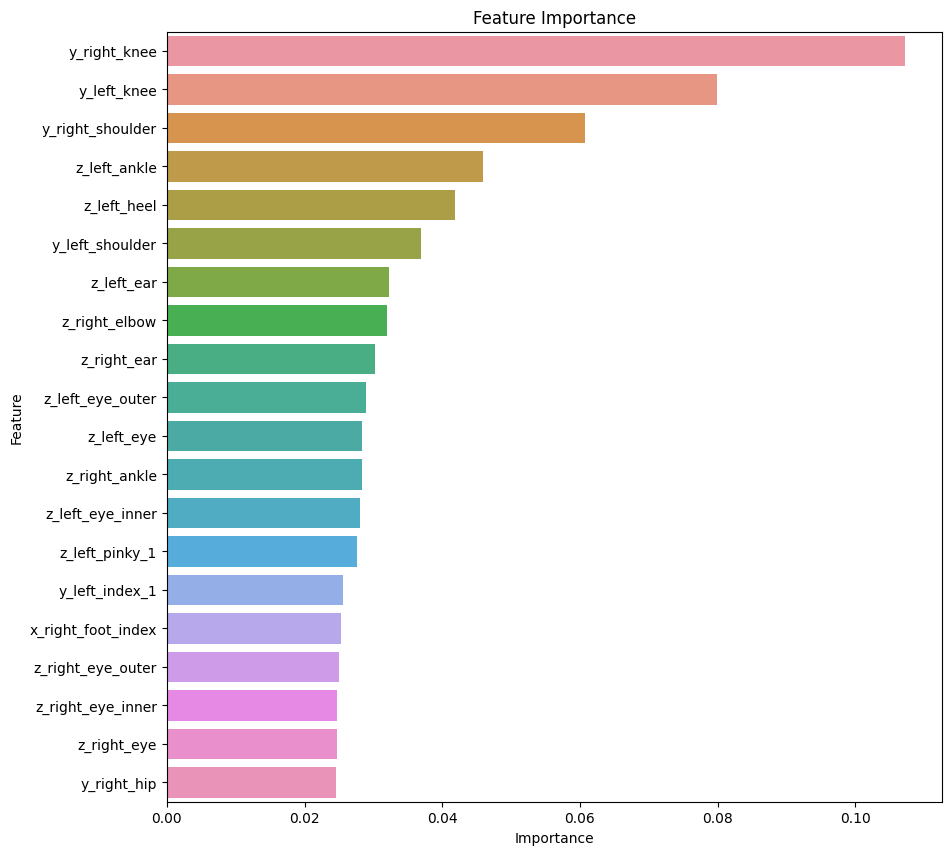

In [71]:
''' Creating a function that gets the data and cleans it for modeling'''

def get_data():
    # Bring in the data
    df = pd.read_csv('/content/Excercise dataset.csv')
    # Drop pose_id column
    df.drop('pose_id', axis=1, inplace=True)
    # Creating a new column for the groups
    df['exercise'] = np.nan
    # If the pose contains the word 'squat' then the exercise is squats
    df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'
    df.loc[df['pose'].str.contains('jumping_jacks'), 'exercise'] = 'jumping jacks'
    df.loc[df['pose'].str.contains('pushup'), 'exercise'] = 'push ups'
    df.loc[df['pose'].str.contains('situp'), 'exercise'] = 'sit ups'
    df.loc[df['pose'].str.contains('pullups'), 'exercise'] = 'pull ups'
    # Dropping pose column
    df.drop('pose', axis=1, inplace=True)

    # going to use LabelEncoder to encode the exercise column
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['exercise'] = le.fit_transform(df['exercise'])

    return df
log_reg()

In [72]:
'''Creating a function that fit a Logistic Regression model and see the accuracy feature importance'''

def log_reg():
    # Getting the data
    df = get_data()
    # Splitting the data into X and y
    X = df.drop('exercise', axis=1)
    y = df['exercise']
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Creating a Logistic Regression model
    log_reg = LogisticRegression()
    # Fitting the model
    log_reg.fit(X_train, y_train)
    # Getting the accuracy score
    print('The accuracy score is: ', accuracy_score(y_test, log_reg.predict(X_test)))
    # Creating a confusion matrix
    print('The confusion matrix is: ', confusion_matrix(y_test, log_reg.predict(X_test)))
    # Creating a classification report
    print('The classification report is: ', classification_report(y_test, log_reg.predict(X_test)))

    # Putting the feature importance into a dataframe
    feature_importance = pd.DataFrame(log_reg.coef_, columns=X.columns)

    # Sorting the values to include top 20
    feature_importance = feature_importance.T.sort_values(by=0, ascending=False).head(20)

    # Plotting the feature importance
    plt.figure(figsize=(10, 10))
    sns.barplot(x=feature_importance[0], y=feature_importance.index)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()



The accuracy score is:  0.7227272727272728
The confusion matrix is:  [[40  3  0  0 16]
 [ 4 23  1  2 12]
 [ 0  1 39  1  1]
 [ 0  6  2 21  6]
 [ 4  1  0  1 36]]
The classification report is:                precision    recall  f1-score   support

           0       0.83      0.68      0.75        59
           1       0.68      0.55      0.61        42
           2       0.93      0.93      0.93        42
           3       0.84      0.60      0.70        35
           4       0.51      0.86      0.64        42

    accuracy                           0.72       220
   macro avg       0.76      0.72      0.72       220
weighted avg       0.76      0.72      0.73       220



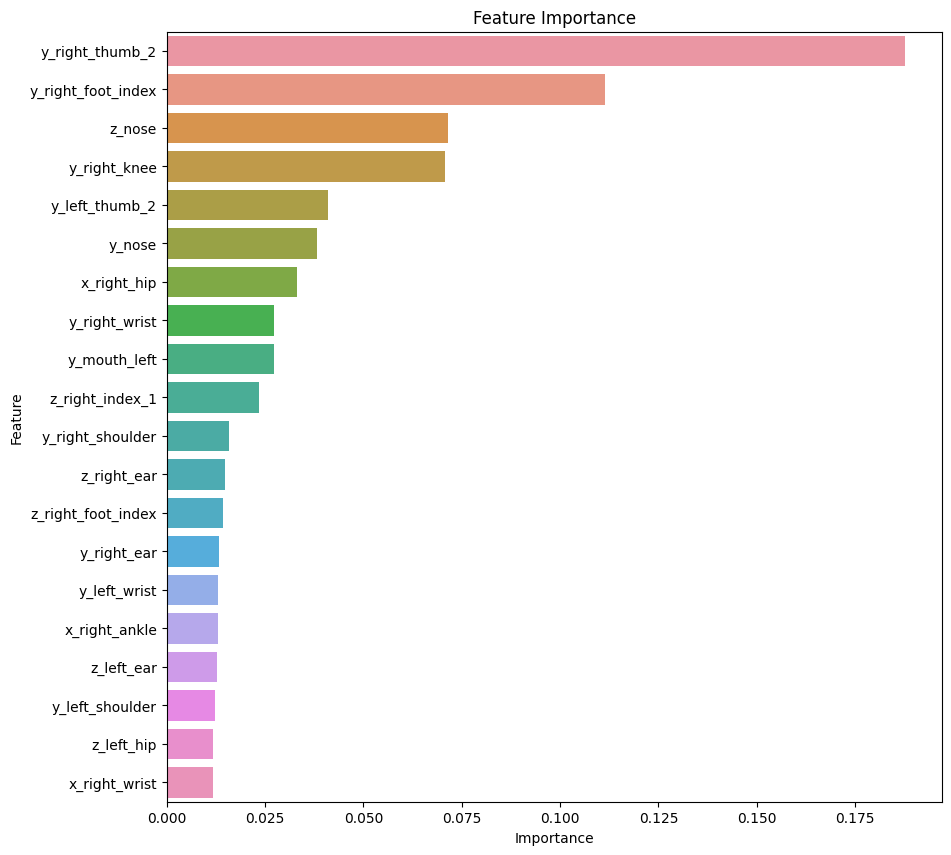

In [75]:
''' Now fitting a decision tree model and seeing the accuracy and feature importance'''

def decision_tree():
    # Getting the data
    df = get_data()
    # Splitting the data into X and y
    X = df.drop('exercise', axis=1)
    y = df['exercise']
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Creating a Decision Tree model
    decision_tree = DecisionTreeClassifier()
    # Fitting the model
    decision_tree.fit(X_train, y_train)
    # Getting the accuracy score
    print('The accuracy score is: ', accuracy_score(y_test, decision_tree.predict(X_test)))
    # Creating a confusion matrix
    print('The confusion matrix is: ', confusion_matrix(y_test, decision_tree.predict(X_test)))
    # Creating a classification report
    print('The classification report is: ', classification_report(y_test, decision_tree.predict(X_test)))


    # Putting the feature importance into a dataframe
    feature_importance = pd.DataFrame(decision_tree.feature_importances_, index=X.columns, columns=['Importance'])

    # Sorting the values to include top 20
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(20)

    # Plotting the feature importance
    plt.figure(figsize=(10, 10))
    sns.barplot(x=feature_importance['Importance'], y=feature_importance.index)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

decision_tree()

The accuracy score is:  0.8818181818181818
The confusion matrix is:  [[50  3  0  0  6]
 [ 1 37  0  2  2]
 [ 0  2 40  0  0]
 [ 0  1  0 32  2]
 [ 6  1  0  0 35]]
The classification report is:                precision    recall  f1-score   support

           0       0.88      0.85      0.86        59
           1       0.84      0.88      0.86        42
           2       1.00      0.95      0.98        42
           3       0.94      0.91      0.93        35
           4       0.78      0.83      0.80        42

    accuracy                           0.88       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.88      0.88      0.88       220



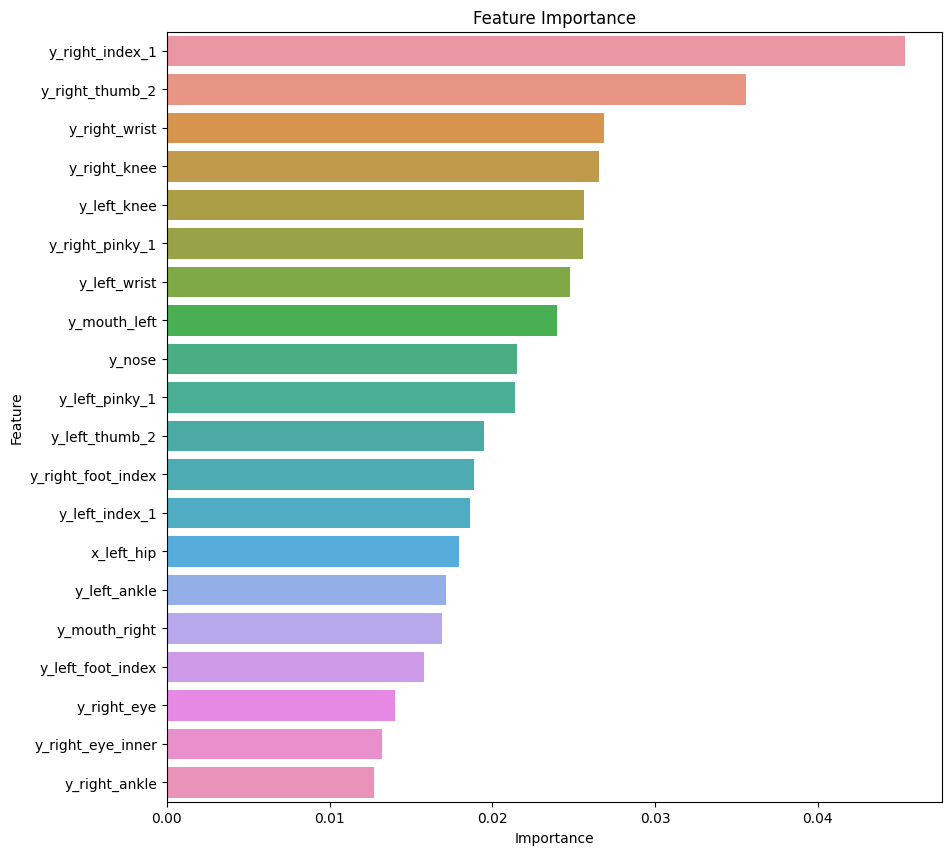

In [76]:
''' Now fitting a random forest model and seeing the accuracy and feature importance'''

def random_forest():
    # Getting the data
    df = get_data()
    # Splitting the data into X and y
    X = df.drop('exercise', axis=1)
    y = df['exercise']
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Creating a Random Forest model
    random_forest = RandomForestClassifier()
    # Fitting the model
    random_forest.fit(X_train, y_train)
    # Getting the accuracy score
    print('The accuracy score is: ', accuracy_score(y_test, random_forest.predict(X_test)))
    # Creating a confusion matrix
    print('The confusion matrix is: ', confusion_matrix(y_test, random_forest.predict(X_test)))
    # Creating a classification report
    print('The classification report is: ', classification_report(y_test, random_forest.predict(X_test)))


    # Putting the feature importance into a dataframe
    feature_importance = pd.DataFrame(random_forest.feature_importances_, index=X.columns, columns=['Importance'])

    # Sorting the values to include top 20
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(20)

    # Plotting the feature importance
    plt.figure(figsize=(10, 10))
    sns.barplot(x=feature_importance['Importance'], y=feature_importance.index)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


random_forest()

The accuracy score is:  0.8863636363636364
The confusion matrix is:  [[52  2  0  0  5]
 [ 0 35  0  0  7]
 [ 0  2 40  0  0]
 [ 0  1  0 32  2]
 [ 5  1  0  0 36]]
The classification report is:                precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.85      0.83      0.84        42
           2       1.00      0.95      0.98        42
           3       1.00      0.91      0.96        35
           4       0.72      0.86      0.78        42

    accuracy                           0.89       220
   macro avg       0.90      0.89      0.89       220
weighted avg       0.90      0.89      0.89       220



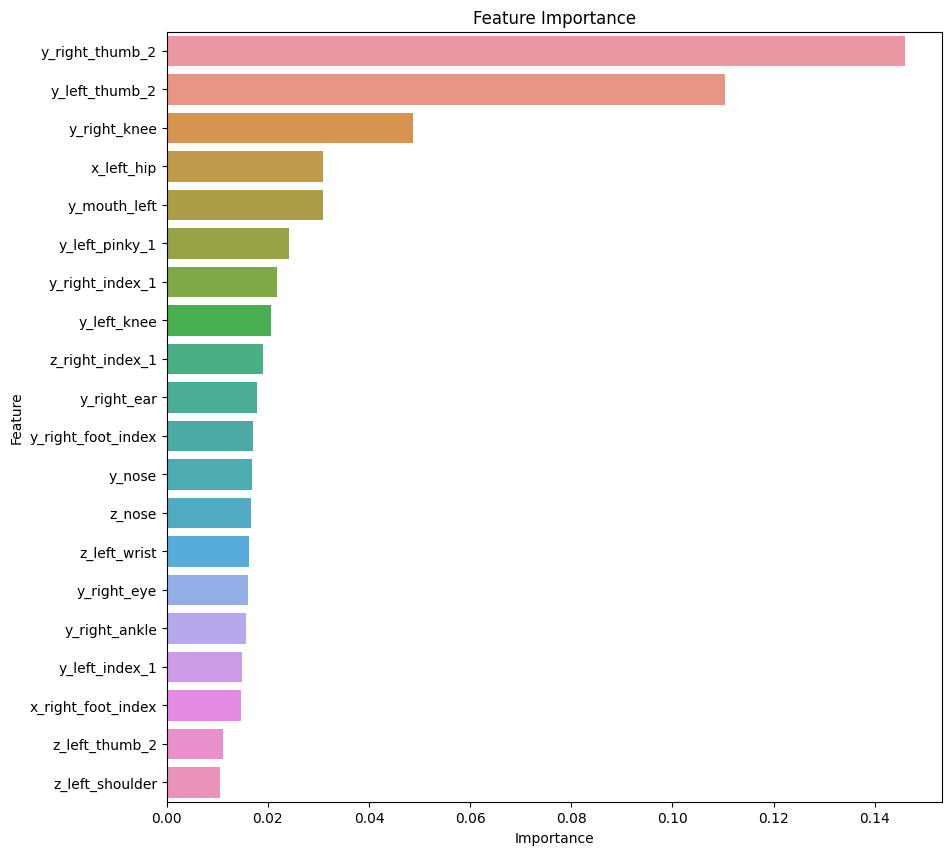

In [77]:
''' Creating a function that fit a XGBoost model and see the accuracy feature importance'''

def xg_boost():
    # Getting the data
    df = get_data()
    # Splitting the data into X and y
    X = df.drop('exercise', axis=1)
    y = df['exercise']
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Creating a XGBoost model
    xg_boost = XGBClassifier()
    # Fitting the model
    xg_boost.fit(X_train, y_train)
    # Getting the accuracy score
    print('The accuracy score is: ', accuracy_score(y_test, xg_boost.predict(X_test)))
    # Creating a confusion matrix
    print('The confusion matrix is: ', confusion_matrix(y_test, xg_boost.predict(X_test)))
    # Creating a classification report
    print('The classification report is: ', classification_report(y_test, xg_boost.predict(X_test)))


    # Putting the feature importance into a dataframe
    feature_importance = pd.DataFrame(xg_boost.feature_importances_, index=X.columns, columns=['Importance'])

    # Sorting the values to include top 20
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(20)

    # Plotting the feature importance
    plt.figure(figsize=(10, 10))
    sns.barplot(x=feature_importance['Importance'], y=feature_importance.index)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

xg_boost()

In [78]:
''' Going to fit a XG Boost on all the data'''

def fit_xg_boost_classifier_all_data():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)


    # Creating a XGBClassifier object

    xgb = XGBClassifier(random_state=42)

    # Fitting the model
    xgb.fit(X_train, y_train)

    # Scoring the model
    score = xgb.score(X_test, y_test)

    # Getting the roc_auc_score
    roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test), average = 'macro', multi_class = 'ovr')

    print(f'accuracy_score: {score}')

    return roc_auc

fit_xg_boost_classifier_all_data()

accuracy_score: 0.8863636363636364


0.9851792856315391

In [79]:
''' Going to fit the Logistic Regression model & get top 10 feature importances, but this time I will scale the data
    using StandardScaler() before fitting the model. '''

def fit_logistic_regression_scaled():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)

    # Scaling the data
    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Creating a logistic regression object
    lr = LogisticRegression(random_state=42)

    # Fitting the model
    lr.fit(X_train_sc, y_train)

    # Scoring the model
    score = lr.score(X_test, y_test)

    # getting the top 10 feature importances from the logistic regression model
    feature_importances = lr.coef_[0]

    # Creating a dictionary of feature importances
    feature_dict = dict(zip(X_train.columns, feature_importances))

    # Sorting the dictionary
    sorted_dict = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))

    # Getting the top features
    top_features_lr = list(sorted_dict.items())[:70]

    return score, top_features_lr

In [80]:
''' Going to fit a GradientBoostingClassifier model & get top 10 feature importances'''

def fit_gradient_boosting_classifier():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)

    # Creating a GradientBoostingClassifier object
    gbc = GradientBoostingClassifier(random_state=42)

    # Fitting the model
    gbc.fit(X_train, y_train)

    # Scoring the model
    score = gbc.score(X_test, y_test)

    # getting the top 10 feature importances from the logistic regression model
    feature_importances = gbc.feature_importances_

    # Creating a dictionary of feature importances
    feature_dict = dict(zip(X_train.columns, feature_importances))

    # Sorting the dictionary
    sorted_dict = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))

    # Getting the top features
    top_features_gbc = list(sorted_dict.items())[:70]

    return score, top_features_gbc

In [81]:
''' Creating a function that will fit a RandomForestClassifier model and get the top 10 feature importances'''

def fit_random_forest_classifier():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)

    # Creating a RandomForestClassifier object
    rfc = RandomForestClassifier(random_state=42)

    # Fitting the model
    rfc.fit(X_train, y_train)

    # Scoring the model
    score = rfc.score(X_test, y_test)

    # getting the top 10 feature importances from the logistic regression model
    feature_importances = rfc.feature_importances_

    # Creating a dictionary of feature importances
    feature_dict = dict(zip(X_train.columns, feature_importances))

    # Sorting the dictionary
    sorted_dict = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))

    # Getting the top features
    top_features_rfc = list(sorted_dict.items())[:70]

    return score, top_features_rfc

In [82]:
''' Creating a function that will fit a XGBClassifier model and get the top 10 feature importances'''

def fit_xg_boost_classifier():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)

    # Creating a XGBClassifier object
    xgb = XGBClassifier(random_state=42)

    # Fitting the model
    xgb.fit(X_train, y_train)

    # Scoring the model
    score = xgb.score(X_test, y_test)

    # getting the top 10 feature importances from the logistic regression model
    feature_importances = xgb.feature_importances_

    # Creating a dictionary of feature importances
    feature_dict = dict(zip(X_train.columns, feature_importances))

    # Sorting the dictionary
    sorted_dict = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))

    # Getting the top features
    top_features_xgb = list(sorted_dict.items())[:70]

    return score, top_features_xgb

In [83]:
''' creating a function that will now fit these models to the data and get the top 10 features from each model and adding keys to a list'''

def get_top_features():


    # Getting the top features from the Logistic Regression model
    score_lr, top_features_lr = fit_logistic_regression_scaled()


    # Getting the top features from the GradientBoostingClassifier model
    score_gbc, top_features_gbc = fit_gradient_boosting_classifier()


    # Getting the top features from the RandomForestClassifier model
    score_rfc, top_features_rfc = fit_random_forest_classifier()


    # Getting the top features from the XGBClassifier model
    score_xgb, top_features_xgb = fit_xg_boost_classifier()

    top_features = []
    for i in range(70):
        top_features.append(top_features_lr[i][0])
        top_features.append(top_features_gbc[i][0])
        top_features.append(top_features_rfc[i][0])
        top_features.append(top_features_xgb[i][0])

    # Getting unique features
    top_features = list(set(top_features))


    return top_features

In [84]:
''' Not going to fit a XGBClassifier model and will incrementally add the top features from the top_features list to see how roc_auc_score changes'''

def fit_xg_boost_classifier_incremental():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)

    features = get_top_features()

    # Creating a XGBClassifier object

    xgb = XGBClassifier(random_state=42)

    # Creating a list to store the roc_auc_score
    roc_auc_scores = []

    # Creating a list to store the features
    feature_list = []

    # Looping through the top features
    for feature in features:
        # Adding the feature to the feature list
        feature_list.append(feature)

        # Fitting the model
        xgb.fit(X_train[feature_list], y_train)

        # Scoring the model
        score = xgb.score(X_test[feature_list], y_test)

        # Getting the roc_auc_score
        roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test[feature_list]), average = 'macro', multi_class = 'ovr')

        # Adding the score to the list if there is no score or if the score is greater than the previous score
        if len(roc_auc_scores) == 0 or roc_auc > roc_auc_scores[-1]:

            # Appending the roc_auc_score to the roc_auc_scores list
            roc_auc_scores.append(roc_auc)
        else:
            # Removing the feature from the feature list
            feature_list.remove(feature)


    # Creating a dictionary of the feature list and the roc_auc_score
    feature_dict = dict(zip(feature_list, roc_auc_scores))

    # Sorting the dictionary
    sorted_dict = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))

    # Getting the top features
    top_features_xgb = list(sorted_dict.items())[:70]

    print("{0:.3f}".format(score))

    return top_features_xgb

In [85]:
fit_xg_boost_classifier_incremental()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.895


[('y_right_thumb_2', 0.9882979662080456),
 ('y_nose', 0.9876288396897971),
 ('z_right_ear', 0.9875137025787584),
 ('x_left_foot_index', 0.9869814043749774),
 ('x_left_eye_inner', 0.9858577484690771),
 ('x_right_ankle', 0.9854767967701322),
 ('y_right_ankle', 0.9850039894983219),
 ('x_right_elbow', 0.981776910321171),
 ('y_right_wrist', 0.9785911016083322),
 ('z_right_thumb_2', 0.9778261856131578),
 ('x_right_index_1', 0.9754241457119088),
 ('z_mouth_left', 0.9722131186663822),
 ('x_left_pinky_1', 0.9649132710023306),
 ('z_left_foot_index', 0.9582093422634106),
 ('z_right_knee', 0.9527853948451599),
 ('x_left_eye', 0.9497258578030936),
 ('x_right_hip', 0.9463862511736789),
 ('x_right_heel', 0.9256544945285476),
 ('y_left_knee', 0.8603296488415182),
 ('y_left_eye_outer', 0.754903388075405)]